MACHINE LEARNING
Seminar 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

1. Loading the dataset from the .txt file and storing the data in a structured manner.

In [10]:
df = pd.read_csv('dataset_Seminar1.txt', sep=' ', header=None)
df.columns
display(df.head(15))

,Number of STAs,Load,Size(x),Size(y),Area,Contention window,Channel width,Packet size,Max RSSI,Avg. RSSI,Min RSSI,Avg. Probability of failure,Throughput,Average delay,Total airtime,Proportional airtime
0,40.0,60000000.0,22.0,39.0,858.0,63.0,80.0,4000.0,-42.928330,-63.163012,-74.965338,0.415189,7.208644e+06,1.229466e+07,1.084041,0.875490
1,35.0,52500000.0,20.0,33.0,660.0,31.0,40.0,10000.0,-47.815800,-63.298410,-72.847989,0.485311,1.545116e+07,1.275042e+07,1.111263,0.873785
2,16.0,12000000.0,34.0,14.0,476.0,255.0,40.0,4000.0,-46.138494,-60.076333,-70.044800,0.099413,6.743660e+06,2.251690e+06,0.880036,0.849701
3,37.0,18500000.0,35.0,7.0,245.0,31.0,80.0,10000.0,-42.708813,-60.141393,-72.029643,0.493704,1.675025e+07,1.211374e+07,1.126341,0.860103
4,18.0,4500000.0,36.0,35.0,1260.0,127.0,160.0,8000.0,-45.492991,-63.780783,-76.225550,0.011664,4.500000e+06,1.446000e-03,0.276770,0.275687
5,3.0,750000.0,27.0,11.0,297.0,511.0,160.0,6000.0,-52.119498,-52.293538,-52.380558,0.000938,7.500000e+05,2.915000e-03,0.059394,0.059375
6,21.0,31500000.0,37.0,37.0,1369.0,63.0,80.0,12000.0,-46.518685,-65.360763,-73.774614,0.309117,2.020151e+07,3.889584e+06,1.026311,0.903537
7,39.0,19500000.0,26.0,26.0,676.0,1023.0,80.0,12000.0,-44.833998,-60.630718,-70.999706,0.071531,1.887521e+07,1.536909e+07,0.824329,0.804576
8,13.0,19500000.0,2.0,27.0,54.0,3.0,80.0,10000.0,-42.537724,-54.701587,-66.405520,0.596899,1.635737e+07,1.530696e+06,1.210037,0.815226
9,34.0,8500000.0,12.0,7.0,84.0,511.0,160.0,4000.0,-43.497708,-50.635535,-55.915320,0.109673,7.143939e+06,9.060295e+06,0.884203,0.848343


2. Displaying statistics about each feature (mean, standard deviation).

In [24]:
for column in df.columns:
    print(column)
    print("Mean", df[column].mean(axis=0))
    print("Standard deviation", df[column].std(axis=0))
    print()

Number of STAs
Mean 21.44617
Standard deviation 11.554365294756723

Load
Mean 21402920.0
Standard deviation 18520420.534735885

Size(x)
Mean 20.56294
Standard deviation 11.545206428396503

Size(y)
Mean 20.47964
Standard deviation 11.540625517309564

Area
Mean 421.27035
Standard deviation 360.34434886837636

Contention window
Mean 227.04392
Standard deviation 323.3508545663531

Channel width
Mean 75.106
Standard deviation 53.70427921029543

Packet size
Mean 7997.58
Standard deviation 2825.5325126338657

Max RSSI
Mean -45.911165401990004
Standard deviation 5.4002653047794045

Avg. RSSI
Mean -57.57742637042
Standard deviation 6.108547533579559

Min RSSI
Mean -66.46782748315
Standard deviation 8.057527794685008

Avg. Probability of failure
Mean 0.22667609688
Standard deviation 0.22484756924908125

Throughput
Mean 9716009.36023311
Standard deviation 4958024.818157942

Average delay
Mean 4688176.278499954
Standard deviation 7875887.345974391

Total airtime
Mean 0.7805603242800001
Standard de

3. Plotting relevant figures to visualize how data is distributed.

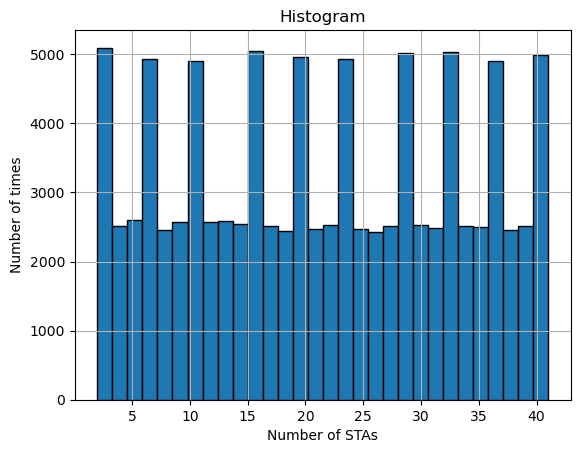

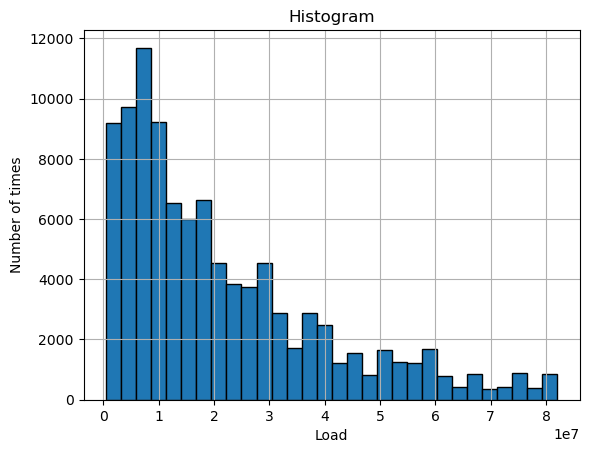

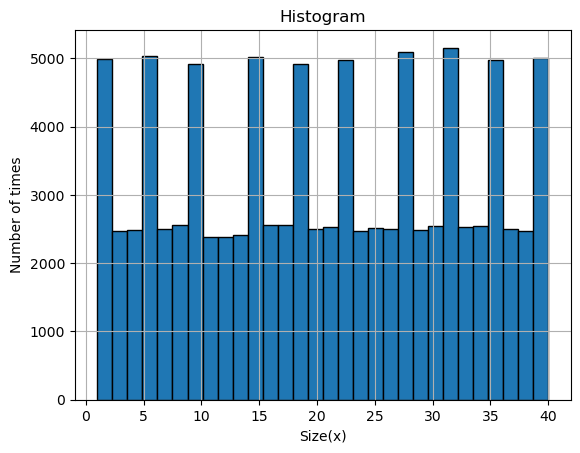

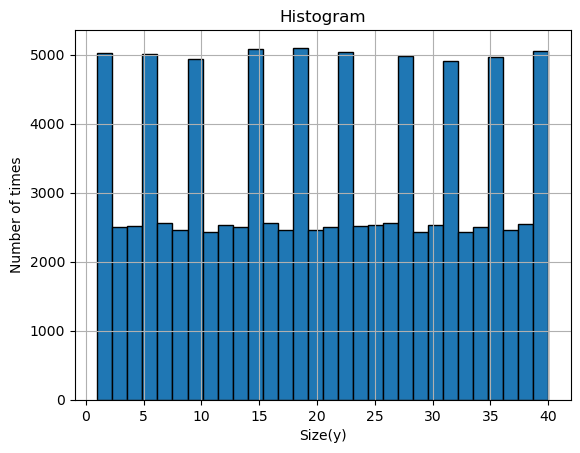

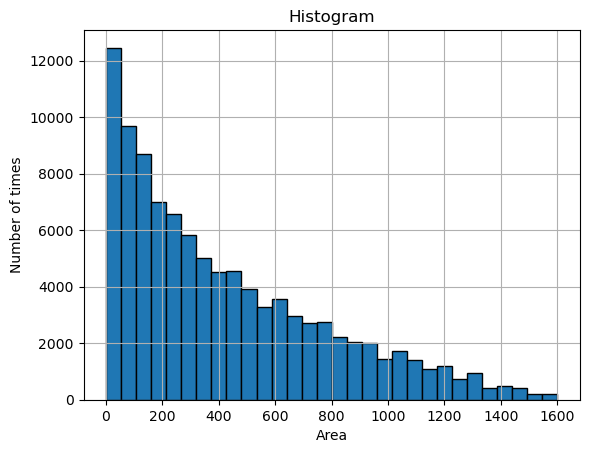

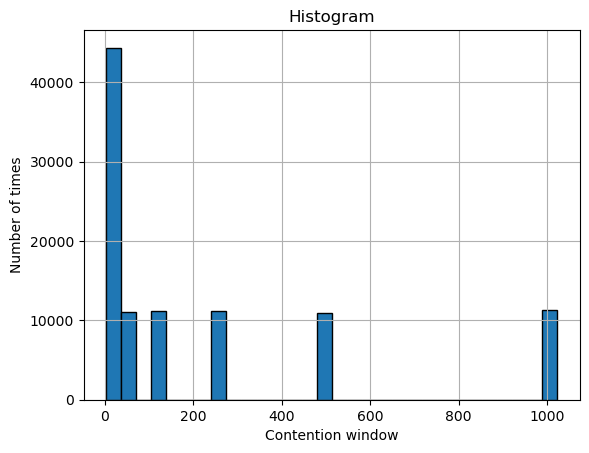

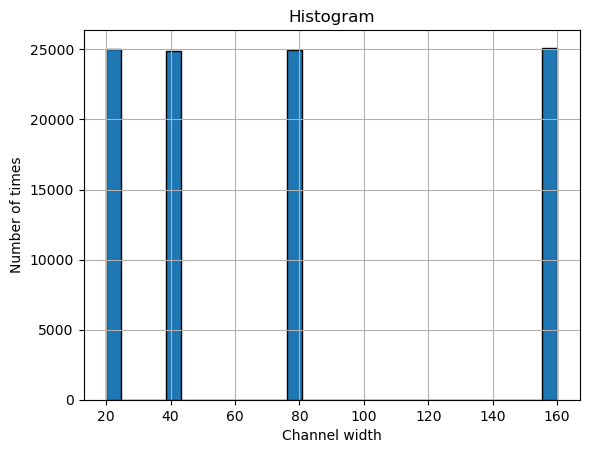

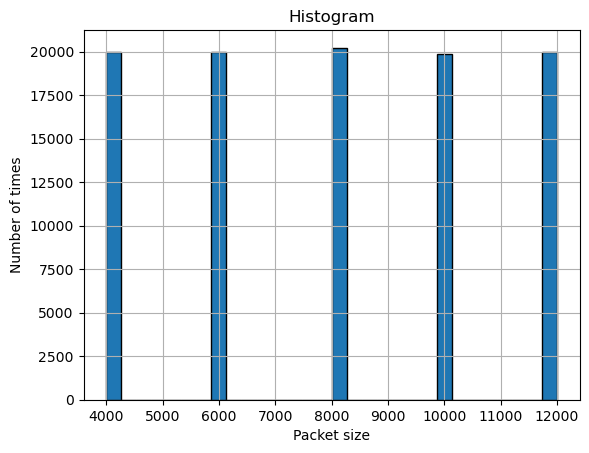

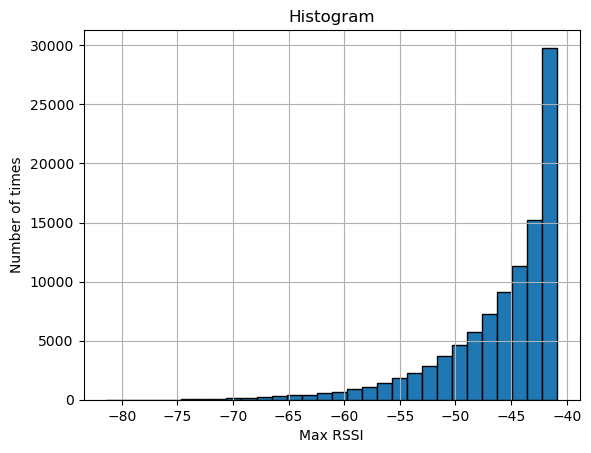

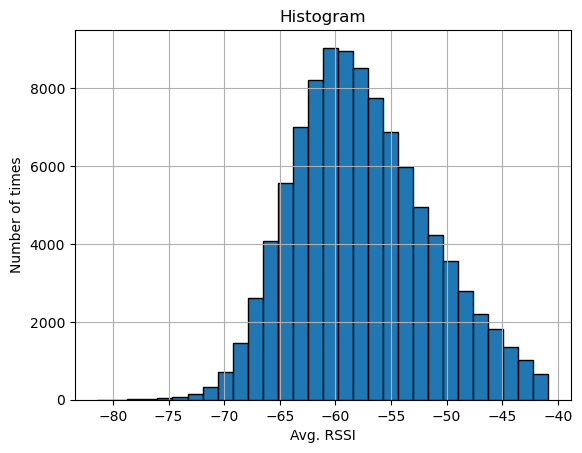

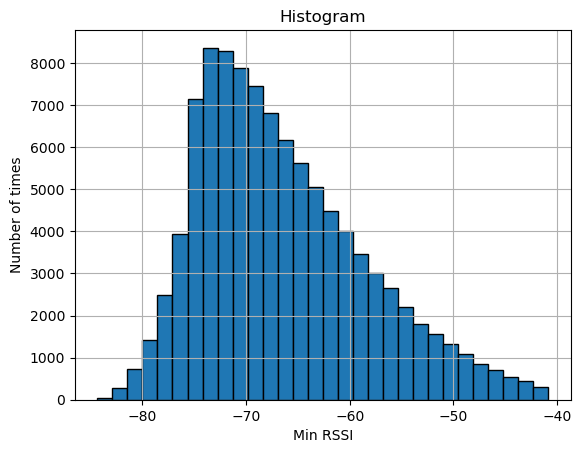

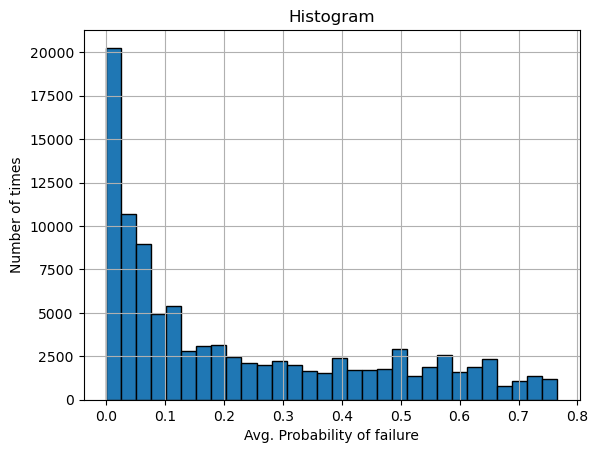

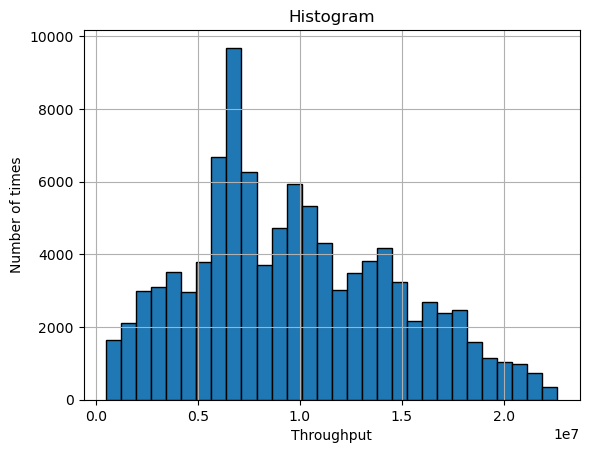

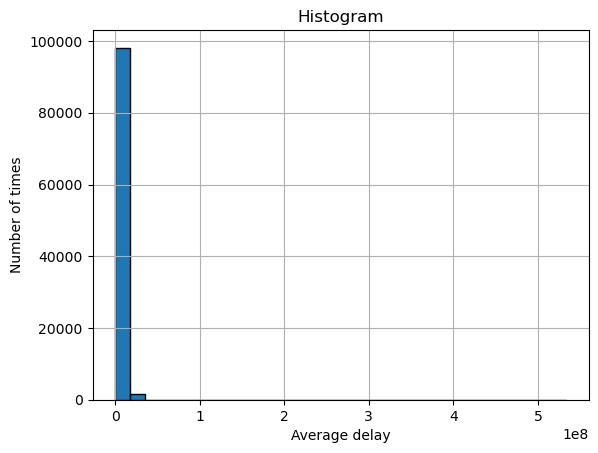

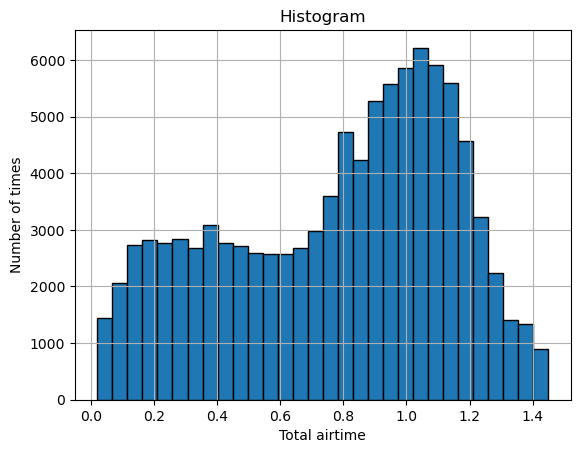

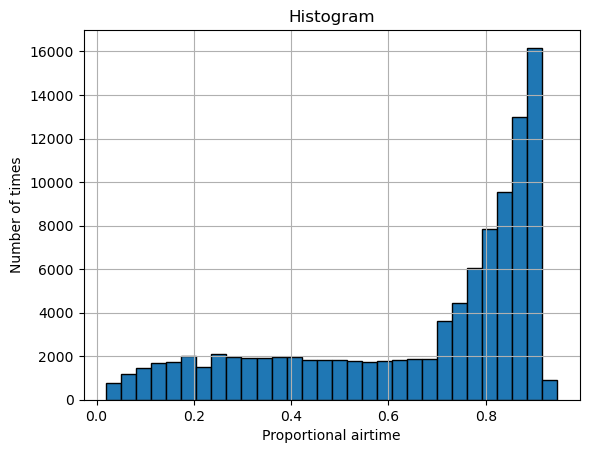

In [77]:
for column in df.columns:
    df[column].hist(bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel("Number of times")
    plt.title("Histogram")
    plt.show()

In [ ]:
cleaned_df = df.copy()

#We can drop variables that follow a distribution similar to the uniform one
columns_to_drop = ["Number of STAs", "Size(x)", "Size(y)", "Average delay", "Avg. Probability of failure", "Total airtime", "Proportional airtime"]

cleaned_df = cleaned_df.drop(columns=columns_to_drop)
pd.plotting.scatter_matrix(cleaned_df, figsize = (15, 15))

array([[<Axes: xlabel='Load', ylabel='Load'>,
        <Axes: xlabel='Area', ylabel='Load'>,
        <Axes: xlabel='Contention window', ylabel='Load'>,
        <Axes: xlabel='Channel width', ylabel='Load'>,
        <Axes: xlabel='Packet size', ylabel='Load'>,
        <Axes: xlabel='Max RSSI', ylabel='Load'>,
        <Axes: xlabel='Avg. RSSI', ylabel='Load'>,
        <Axes: xlabel='Min RSSI', ylabel='Load'>,
        <Axes: xlabel='Throughput', ylabel='Load'>],
       [<Axes: xlabel='Load', ylabel='Area'>,
        <Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Contention window', ylabel='Area'>,
        <Axes: xlabel='Channel width', ylabel='Area'>,
        <Axes: xlabel='Packet size', ylabel='Area'>,
        <Axes: xlabel='Max RSSI', ylabel='Area'>,
        <Axes: xlabel='Avg. RSSI', ylabel='Area'>,
        <Axes: xlabel='Min RSSI', ylabel='Area'>,
        <Axes: xlabel='Throughput', ylabel='Area'>],
       [<Axes: xlabel='Load', ylabel='Contention window'>,
        <Axes: 

Error in callback <function _draw_all_if_interactive at 0x000001D96480D6C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

4. Processing the data (e.g., cleaning, normalization, categorical, etc.) and prepare it to be used by an ML model.